## Which boroughs in London have seen the greatest increase in housing prices, on average, over the last two decades?

### Available dataset contains information about average housing price per month from 1995 to 2020 for the boroughs(districts)in london.

## Imports and load data

1.1. Importing Libraries

In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
# Load the pyplot collection of functions from matplotlib, as plt 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1.2. Loading the data
Your data comes from the London Datastore: a free, open-source data-sharing portal for London-oriented datasets.

In [2]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

## 2. Cleaning, transforming, and visualizing

### 2.1. Exploring your data

In [3]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


In [4]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            308 non-null    datetime64[ns]
 1   City of London        309 non-null    object        
 2   Barking & Dagenham    309 non-null    object        
 3   Barnet                309 non-null    object        
 4   Bexley                309 non-null    object        
 5   Brent                 309 non-null    object        
 6   Bromley               309 non-null    object        
 7   Camden                309 non-null    object        
 8   Croydon               309 non-null    object        
 9   Ealing                309 non-null    object        
 10  Enfield               309 non-null    object        
 11  Greenwich             309 non-null    object        
 12  Hackney               309 non-null    object        
 13  Hammersmith & Fulham

In [5]:
#let's drop 3 columns with 0 non-null elements.
properties= properties.drop(labels=['Unnamed: 34', 'Unnamed: 37','Unnamed: 47'],axis=1)
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            308 non-null    datetime64[ns]
 1   City of London        309 non-null    object        
 2   Barking & Dagenham    309 non-null    object        
 3   Barnet                309 non-null    object        
 4   Bexley                309 non-null    object        
 5   Brent                 309 non-null    object        
 6   Bromley               309 non-null    object        
 7   Camden                309 non-null    object        
 8   Croydon               309 non-null    object        
 9   Ealing                309 non-null    object        
 10  Enfield               309 non-null    object        
 11  Greenwich             309 non-null    object        
 12  Hackney               309 non-null    object        
 13  Hammersmith & Fulham

### 2.2. Cleaning the data

Transpose the dataframe, check out what its row indexes are, and reset the index. 
Assign the values of the first row to your column headings . 

In [6]:
properties= properties.transpose()
properties.head()

,0,1,2,3,4,5,6,7,8,9,...,299,300,301,302,303,304,305,306,307,308
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,104473,...,776894,737275,747611,777640,844989,867841,899831,938833,852151,814665
Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,51471.6,...,306390,301283,303653,304265,304099,283139,295744,300595,304223,302395
Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,93273.1,...,522639,519306,518542,519121,527747,526553,532503,519064,524400,522846
Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,64509.5,...,333657,336302,334765,337760,339215,346840,339408,341611,344964,350938


In [7]:
properties.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Inner London', 'Outer London', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS', 'WEST MIDLANDS',
       'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 'SOUTH WEST', 'England'],
      dtype='object')

In [8]:
properties= properties.reset_index()

In [9]:
# Assign the first row as the column labels, then drop the row.
properties.columns= list(properties.iloc[0,:])

properties= properties.drop(labels=0, axis=0)
properties.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,776894,737275,747611,777640,844989,867841,899831,938833,852151,814665
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,306390,301283,303653,304265,304099,283139,295744,300595,304223,302395
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,522639,519306,518542,519121,527747,526553,532503,519064,524400,522846
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,333657,336302,334765,337760,339215,346840,339408,341611,344964,350938
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,432188,427126,423161,467145,461398,494455,466574,487237,481094,487949


### 2.3. Cleaning the data

In [10]:
# Rename the first two columns as Borough and ID respectively.
properties.rename(columns= {'Unnamed: 0': 'Borough', properties.iloc[:,1].name:'ID'}, inplace= True)
properties.head()

,Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,776894,737275,747611,777640,844989,867841,899831,938833,852151,814665
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,306390,301283,303653,304265,304099,283139,295744,300595,304223,302395
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,522639,519306,518542,519121,527747,526553,532503,519064,524400,522846
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,333657,336302,334765,337760,339215,346840,339408,341611,344964,350938
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,432188,427126,423161,467145,461398,494455,466574,487237,481094,487949


In [11]:
# check the charactristics of transposed DataFrame.
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 1 to 45
Columns: 310 entries, Borough to 2020-08-01 00:00:00
dtypes: object(310)
memory usage: 109.3+ KB


In [12]:
# Check whether Borough and ID columns have equal number of unique elements which is equal to length of DataFrame.
print(len(properties.Borough.unique()) == len(properties.ID.unique())) 
print(len(properties.Borough.unique()) == len(properties))

True
True


In [13]:
print('properties shape: ',properties.shape)

properties shape:  (45, 310)


### 2.4.Transforming the data

Let's melt the DataFrame and make sure the column data types are all correct. Average prices, for example, should be floating point numbers..

In [14]:
melted= pd.melt(properties, id_vars =['Borough','ID'], var_name= 'Month',value_name= 'AveragePrices')

print(melted.shape)
melted.head()

(13860, 4)


,Borough,ID,Month,AveragePrices
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


In [15]:
# Check data type in AveragePrices column is float.
pd.api.types.is_float_dtype(melted['AveragePrices'])

False

In [16]:
# set data type of AveragePrices column as float.
melted['AveragePrices']= melted.AveragePrices.astype(float)
pd.api.types.is_float_dtype(melted.AveragePrices)

True

In [17]:
# Check data type of Column of Month is datetime.
np.issubdtype(melted.Month.dtype, np.datetime64)

True

In [18]:
# Check data type of Column of Borough is string.
pd.api.types.is_string_dtype(melted.Borough)

True

In [19]:
# Check data type of Column of ID is string.
pd.api.types.is_string_dtype(melted.ID)

True

### 2.5. Cleaning the data

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? How many entries do you have in that column?
Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit.

In [20]:
print('# observation in Borough column: ',len(melted.Borough))
print('# observation in ID column: ',len(melted.ID))
print('# observation in Month column: ',len(melted.Month))

# observation in Borough column:  13860
# observation in ID column:  13860
# observation in Month column:  13860


In [21]:
#Check out # null vlaue in Borough column.
sum(melted.Borough.isnull())

0

### 2.6. Visualizing the data

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

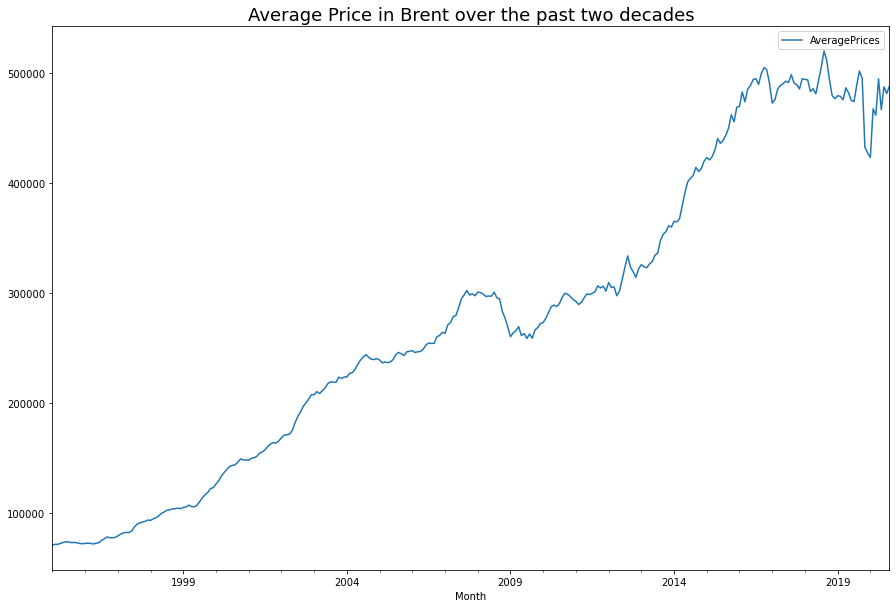

In [22]:
# Visualize average price trend in Borough of 'Brent' over the past 2 dacades.
data= melted[melted['Borough'] == 'Brent']
data.plot(x='Month', y='AveragePrices',figsize=(15,10))
plt.title('Average Price in Brent over the past two decades', size=18)
plt.show()

In [23]:
# Extract year from column of Month.
melted['Year']= melted.Month.apply(lambda x: x.year)
melted['Year']

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
13855    2020
13856    2020
13857    2020
13858    2020
13859    2020
Name: Year, Length: 13860, dtype: int64

## 3. Modeling

Which boroughs of London have seen the greatest house price increase, on average, over the past two decades(1998-2018)?

In [24]:
# Compute mean of average price for each Borough in each year and store the result as multiIndex pandas Series.
splitting= melted.groupby(['Borough','Year'])['AveragePrices'].mean()
print('splitting is a :',type(splitting))
splitting.head(10)

splitting is a : <class 'pandas.core.series.Series'>


Borough             Year
Barking & Dagenham  1995     51817.969390
                    1996     51718.192690
                    1997     55974.262309
                    1998     60285.821083
                    1999     65320.934441
                    2000     77549.513290
                    2001     88664.058223
                    2002    112221.912482
                    2003    142498.927800
                    2004    158175.982483
Name: AveragePrices, dtype: float64

In [25]:
# Convert the multiIndex Series to a DataFrame by unstacking the inner index of Year.
df= splitting.unstack(level=1)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Borough,,,,,,,,,,,,,,,,,,,,,
Barking & Dagenham,51817.969390,51718.192690,55974.262309,60285.821083,65320.934441,77549.513290,88664.058223,112221.912482,142498.927800,158175.982483,...,163465.144225,165863.911600,173733.624933,201172.229417,233460.107425,273919.636042,287734.717358,295196.673612,298620.203492,299764.135487
Barnet,91792.537433,94000.445448,106883.185546,122359.468033,136004.512067,167952.633958,185563.352600,220746.059225,251212.927683,271854.112992,...,338978.012525,358627.346250,374770.610075,430363.351225,478687.949875,525939.577300,538281.017008,533266.534055,519611.265983,523847.033963
Bexley,64291.532845,65490.417234,70789.406603,80632.020822,86777.715903,103186.665184,116527.134750,136797.964475,164482.038908,179141.168258,...,200672.256583,202546.430625,213470.261625,244459.437750,274209.280967,321563.508775,335694.468958,342603.605654,336858.000467,341937.547738
Brent,73029.841840,75235.918367,86749.070663,100692.590417,112157.469808,140962.500458,157287.404625,185898.147992,216501.757008,236023.435958,...,298964.549867,314112.757642,339655.613158,394687.482225,440951.665383,489469.418367,487703.754375,492845.371253,474513.082183,471126.429438
Bromley,81967.316732,83547.483632,94224.688035,108286.520467,120874.179567,147826.713417,162131.842133,186646.043217,215992.974433,234462.682883,...,274874.578075,282025.008583,296669.204058,347857.248267,385681.450108,428008.119983,441218.585283,443409.985635,436459.813675,433549.095712


In [26]:
# Compute the change ratio and assign to a new column of 'ratio'. Then sort df based on values in the column of ratio.
df['ratio']= df[2018].divide(df[1998],axis='rows')
df= df.sort_values('ratio', ascending= False)
print('5 highest increase rate:\n\n',df['ratio'].head())
print('\n\n5 lowest increase rate:\n\n',df['ratio'].tail(5))

5 highest increase rate:

 Borough
Hackney           6.198286
Waltham Forest    5.834756
Southwark         5.516485
Lewisham          5.449221
Westminster       5.353565
Name: ratio, dtype: float64


5 lowest increase rate:

 Borough
EAST MIDLANDS         3.632735
NORTH WEST            3.363416
YORKS & THE HUMBER    3.356065
WEST MIDLANDS         3.311262
NORTH EAST            2.828081
Name: ratio, dtype: float64


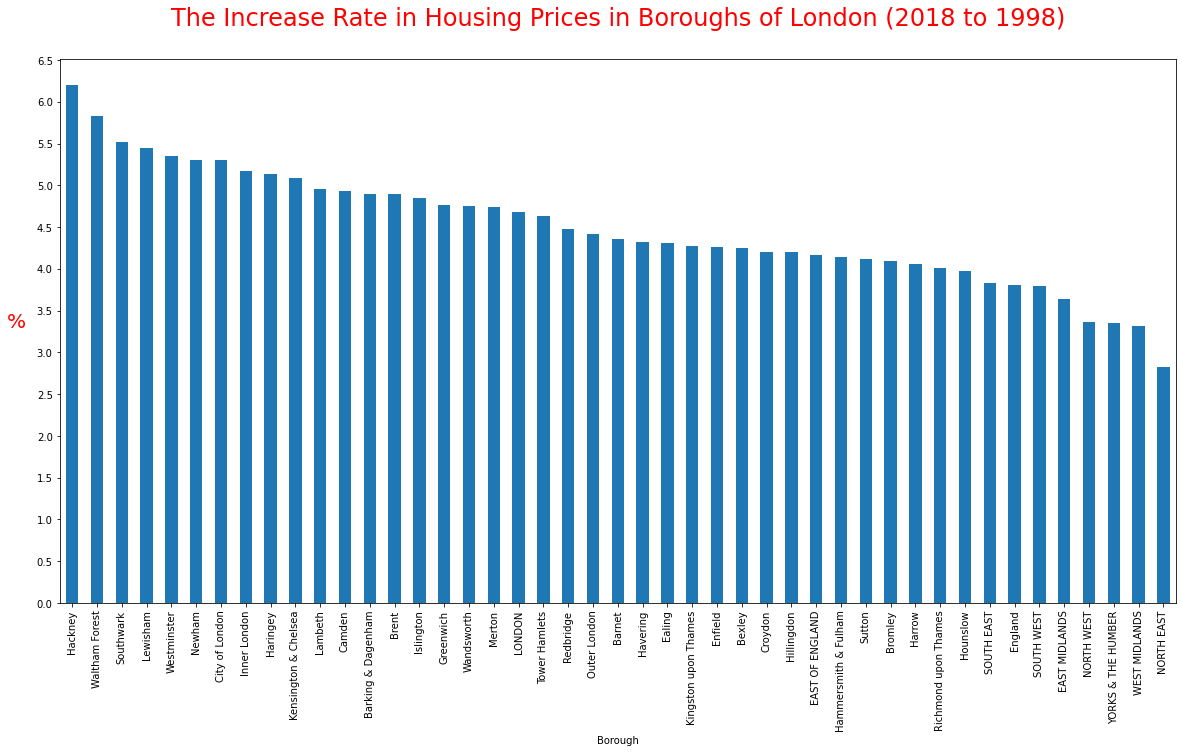

In [27]:
fig= df.ratio.plot(kind='bar', figsize=(20,10))
fig.set_title('The Increase Rate in Housing Prices in Boroughs of London (2018 to 1998)\n', 
          size= 24,c='red')
fig.set_ylabel('%', rotation='horizontal', size=20, color='red', labelpad=20)
fig.set_yticks(np.arange(0,7,0.5))
plt.show()

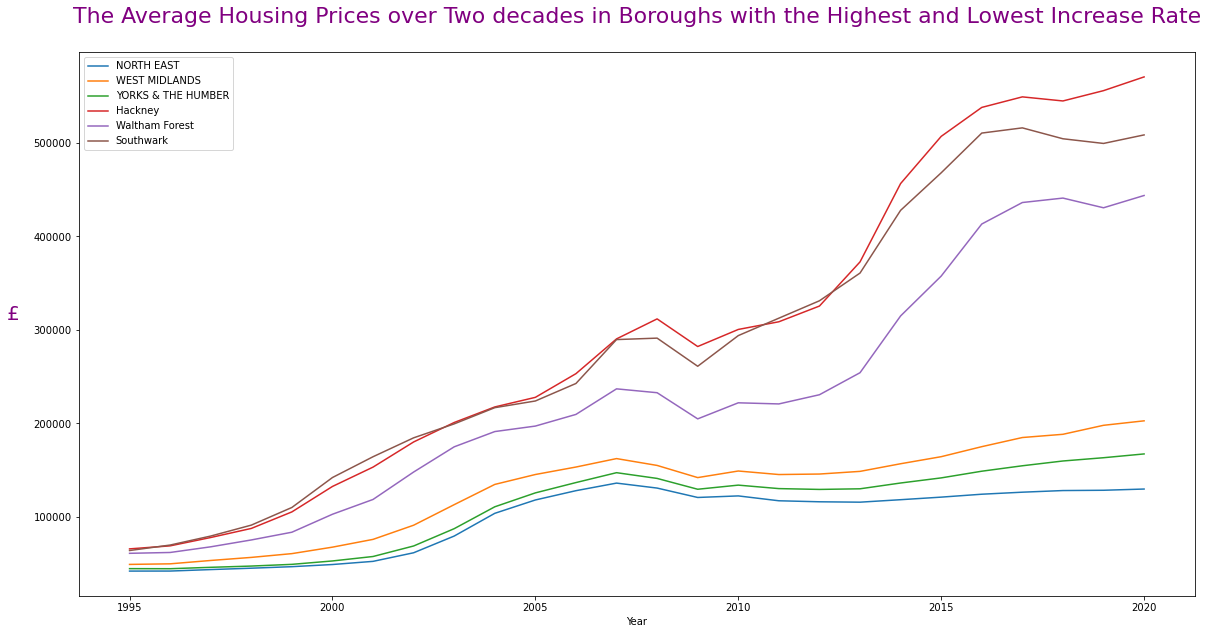

In [32]:
data = df.drop('ratio', axis=1)
for x in ['NORTH EAST','WEST MIDLANDS','YORKS & THE HUMBER','Hackney','Waltham Forest','Southwark']:
    data.loc[x,:].plot(legend= True, figsize=(20,10))
    
plt.title('The Average Housing Prices over Two decades in Boroughs with the Highest and Lowest Increase Rate\n', 
          size= 22,c='purple')
plt.ylabel('£', size=20,c='purple', rotation= 'horizontal', labelpad=20)
plt.show()

## 4. Conclusion

The Average increase rate in housing price among 45 Boroughs of London, between 1998 and 2018 was in the range of 2.83% to 6.20%. 'Hackney' with an increase rate of 6.20% had the most significant increase rate while 'Waltham Forest' and 'Southwark' experienced 5.84% and 5.52% increase rate respectively. 'NORTH WEST' with 2.83% had the lowest increase rate after 'WEST MIDLANDS' with 3.31% increase rate.  

5 Boroughs with the highest increase rate:

    Hackney               6.198286

    Waltham Forest        5.834756

    Southwark             5.516485

    Lewisham              5.449221

    Westminster           5.353565


5 Borough with the lowest increase rate:

    EAST MIDLANDS        3.632735
 
    NORTH WEST            3.363416

    YORKS & THE HUMBER    3.356065

    WEST MIDLANDS         3.311262

    NORTH EAST            2.828081


Based on the graph 'The Average Housing Prices over Two decades', housing prices in Hackney, Waltham Forest and Southwark boroughs grew more sharper than NORTH EAST, WEST MIDLANDS and YORKS & THE HUMBER after 2010.